In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv('C:\\Users\\Home\\Desktop\\data\\telecom.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape#find no.of row and columns

(7043, 21)

In [5]:
df.columns#list columns name

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isna().sum()#sum of null value


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.Churn.value_counts()#particular columns values

No     5174
Yes    1869
Name: Churn, dtype: int64

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

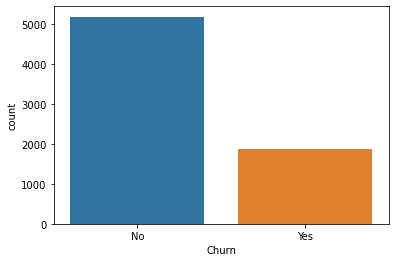

In [10]:
sns.countplot(df.Churn)#different between in particular columns

In [11]:
#precentage converting
num_retained=df[df.Churn=='No'].shape[0]
num_Churmed=df[df.Churn=='Yes'].shape[0]
a=(num_retained/(num_retained+num_Churmed))*100
b=(num_Churmed/(num_retained+num_Churmed))*100
#print churned rate
print(f'percentage of customer is not leaving company {a}')
print(f'percentage of customer is leaving in company {b}')

percentage of customer is not leaving company 73.4630129206304
percentage of customer is leaving in company 26.536987079369588


<AxesSubplot:xlabel='gender', ylabel='count'>

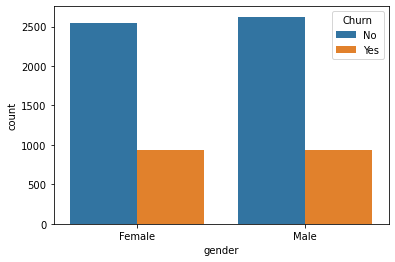

In [12]:
sns.countplot(x='gender',hue='Churn',data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

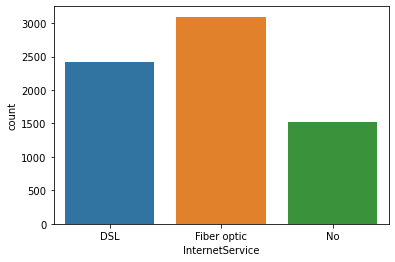

In [13]:
sns.countplot(x='InternetService',data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

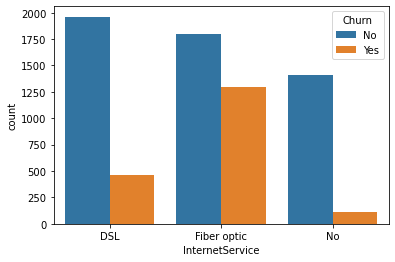

In [14]:
sns.countplot(x='InternetService',hue='Churn',data=df)

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

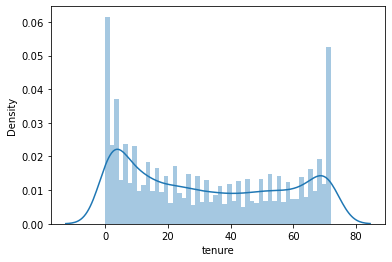

In [15]:
sns.distplot(df.tenure,bins=50)

In [16]:
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [17]:
#convert string to interger or float
df['TotalCharges']=df.TotalCharges.apply(lambda x:x.strip(' '))
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

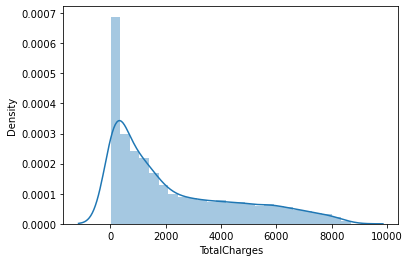

In [18]:

sns.distplot(df.TotalCharges)

In [19]:
data=df.drop(['customerID'],axis=1)#drop the customerID

In [20]:
data.shape

(7043, 20)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
#convert catogrical to numerical by for-loop
for column in data.columns:
    if data.columns.dtype==np.number:
        continue
    data[column]=LabelEncoder().fit_transform(data[column])

C:\Users\Home\AppData\Local\Temp\ipykernel_7644\1439683398.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data.columns.dtype==np.number:


In [23]:
data.dtypes

gender              int32
SeniorCitizen       int64
Partner             int32
Dependents          int32
tenure              int64
PhoneService        int32
MultipleLines       int32
InternetService     int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
TechSupport         int32
StreamingTV         int32
StreamingMovies     int32
Contract            int32
PaperlessBilling    int32
PaymentMethod       int32
MonthlyCharges      int64
TotalCharges        int64
Churn               int32
dtype: object

In [24]:
data[column]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [25]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1


In [26]:
x=data.drop(['Churn'],axis=1)

In [27]:
y=data.Churn

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:

lr=LogisticRegression()

In [32]:
lr.fit(x_train,y_train)

C:\Users\Home\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
pred=lr.predict(x_test)

In [34]:
pred[0:5]

array([0, 1, 0, 0, 0])

In [35]:
y_test[0:5]

7028    0
5190    0
5768    0
6918    1
6875    0
Name: Churn, dtype: int32

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
confusion_matrix(pred,y_test)#confusion_matrix

array([[918, 203],
       [ 88, 200]], dtype=int64)

In [38]:
print(classification_report(pred,y_test))#classification_report

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1121
           1       0.50      0.69      0.58       288

    accuracy                           0.79      1409
   macro avg       0.70      0.76      0.72      1409
weighted avg       0.83      0.79      0.81      1409



In [39]:
!pip install -U imbalanced-learn

In [40]:
from imblearn import over_sampling,under_sampling

In [41]:
from imblearn.over_sampling import RandomOverSampler

In [42]:
ro=RandomOverSampler()

In [43]:
X,Y=ro.fit_resample(x,y)

In [44]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [45]:
Y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [46]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2)

In [47]:
lr.fit(x_train,y_train)

C:\Users\Home\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
pred1=lr.predict(x_test)

In [49]:
confusion_matrix(pred1,y_test)

array([[786, 212],
       [276, 796]], dtype=int64)

In [50]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       998
           1       0.79      0.74      0.77      1072

    accuracy                           0.76      2070
   macro avg       0.76      0.77      0.76      2070
weighted avg       0.77      0.76      0.76      2070



# apply grid and random model

In [51]:
x=np.asarray(x)
y=np.asarray(y)

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [53]:
model=SVC()

In [54]:
from sklearn.model_selection import train_test_split